In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from glob import glob
import json
import sys
import os
from matplotlib.ticker import MultipleLocator
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import select_N_one_standard_error
from src.processing import GatherFeatureDatasets
from src.feature_selection import CustomRFECV
from src import plotting


In [3]:
proc = GatherFeatureDatasets(is_p=False)
feature_names = proc.get_feature_plot_names(18, 'dist')
print(feature_names)

['ratio 1' 'ratio 2' 'ratio 3' 'ratio 4' 'ratio 5' 'ratio 6' 'ratio 7'
 'ratio 8' 'ratio 9' 'ratio 10' 'ratio 11' 'ratio 12' 'ratio 13'
 'ratio 14' 'ratio 15' 'ratio 16' 'ratio 17' 'ratio 18' 'amp. 1' 'amp. 2'
 'amp. 3' 'amp. 4' 'amp. 5' 'amp. 6' 'amp. 7' 'amp. 8' 'amp. 9' 'amp. 10'
 'amp. 11' 'amp. 12' 'amp. 13' 'amp. 14' 'amp. 15' 'amp. 16' 'amp. 17'
 'amp. 18' 'sig. dom. freq.' 'sig. dom. amp.' 'noise max. amp.'
 'sig. max. amp.' 'sig. var.' 'noise var.' 'depth' 'distance' 'back az.']


In [4]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_selection_update/rfecvP_diffSeeds'

In [5]:
SMALL_SIZE=8
MEDIUM_SIZE=9
LARGE_SIZE=8.5
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=MEDIUM_SIZE)

In [6]:
file = os.path.join(datadir, "YUF.SVR.DT.rel.rfecv.json")
with open(file) as fp:
    rfecv_results = json.load(fp)

In [7]:
file = os.path.join(datadir, "YUF.SVR.DT.rel.rfe.full.json")
with open(file) as fp:
    rfefull_results = json.load(fp)

In [8]:
rfecv_results.keys()

dict_keys(['best_N', 'best_N_score', 'oste_N', 'oste_N_score', 'N_scores', 'selected_feats', 'intrinsic_K_feature_selection', 'total_time'])

In [9]:
rfefull_results.keys()

dict_keys(['best', 'oste', 'intrinsic_K_feature_selection'])

In [10]:
rfecv_results['oste_N']

7

In [11]:
rfefull_results

{'best': {'N': 18,
  'selected_feature_inds': [18,
   43,
   19,
   21,
   24,
   42,
   40,
   20,
   5,
   44,
   4,
   37,
   41,
   3,
   6,
   1,
   39,
   38],
  'pred_cv_mean': 0.9025998516474629,
  'pred_cv_std': 0.024969962384214346,
  'pred_cv_params': {'m__C': 10, 'm__gamma': 0.01}},
 'oste': {'N': 7,
  'selected_feature_inds': [18, 43, 19, 21, 24, 42, 40],
  'pred_cv_mean': 0.8879098545979763,
  'pred_cv_std': 0.030515864472593215,
  'pred_cv_params': {'m__C': 10, 'm__gamma': 0.1}},
 'intrinsic_K_feature_selection': [[6, 5, 3, 4, 1], [18, 19, 21, 20, 24]]}

In [12]:

rfecv_best_cnts = CustomRFECV.make_feature_count_df({"YUF": rfecv_results}, 
                                          feature_names,
                                          CustomRFECV.get_rfecv_important_feature_counts,
                                          filter_zeros=False,
                                          oste_feats=False)
rfecv_oste_cnts = CustomRFECV.make_feature_count_df({"YUF": rfecv_results}, 
                                          feature_names,
                                          CustomRFECV.get_rfecv_important_feature_counts,
                                          filter_zeros=False,
                                          oste_feats=True)

In [13]:

rfefull_best_cnts = CustomRFECV.make_feature_count_df({"YUF": rfefull_results}, 
                                          feature_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          filter_zeros=False,
                                          oste_feats=False)
rfefull_oste_cnts = CustomRFECV.make_feature_count_df({"YUF": rfefull_results}, 
                                          feature_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          filter_zeros=False,
                                          oste_feats=True)

In [14]:
# rfecv_best_cnts = rfecv_best_cnts.reset_index().rename(columns={"YUF":"Best"})
# rfecv_oste_cnts = rfecv_oste_cnts.reset_index().rename(columns={"YUF":"OSTE"})
rfecv_best_cnts.columns = ["Best"]
rfecv_oste_cnts.columns = ["OSTE"]
rfefull_best_cnts.columns = ["Best"]
rfefull_oste_cnts.columns = ["OSTE"]
rfefull_merge = rfefull_best_cnts.merge(rfefull_oste_cnts, on='Feature')
rfecv_merge = rfecv_best_cnts.merge(rfecv_oste_cnts, on='Feature')

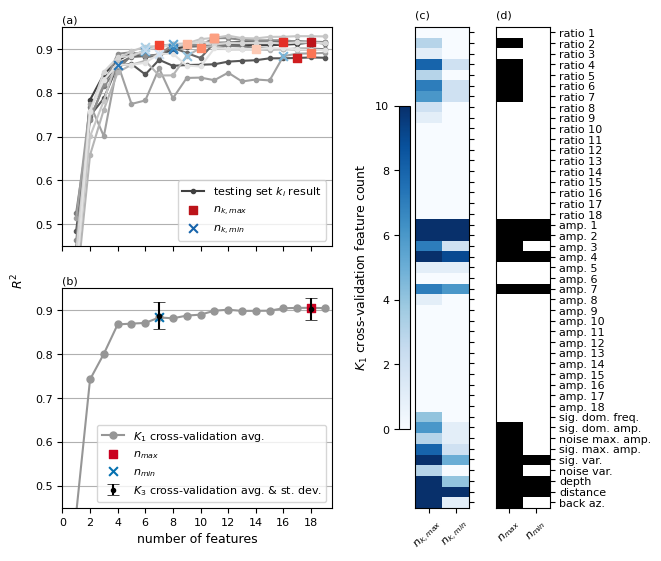

In [15]:
best_N_label = '$\it{n}$$_{max}$'
oste_N_label = '$\it{n}$$_{min}$'
bestk_N_label = '$\it{n}$$_{k,max}$'
ostek_N_label = '$\it{n}$$_{k,min}$'
# fig, axes = plt.subplots(2, 2)
fig, axes = plt.subplot_mosaic([['upper left', 'middle', 'right'],
                               ['lower left', 'middle', 'right']],
                               layout="constrained", width_ratios=[1.0, 0.2, 0.2],
                               figsize=(6.5, 5.5),
                               gridspec_kw={'wspace':0.1})
full_score_array = rfecv_results['N_scores']
N = len(full_score_array[0])
x = np.arange(N)+1

# Plot all profiles for K-fold cross-val
line_label = 'testing set $k_i$ result'
bestk_scatter_label = bestk_N_label
ostek_scatter_label = ostek_N_label
for j, f in enumerate(full_score_array):
    # Use color gradient for each i
    cmval = (j/(len(full_score_array)+5))+0.2
    color = cm.Greys_r(cmval)
    axes['upper left'].plot(x, f, 
                            color=color, 
                            label=line_label,
                            marker='.')
    cv_best_N = np.argmax(f)
    cv_oste_N = select_N_one_standard_error(f, larger_score_is_better=True)
    axes['upper left'].scatter(cv_best_N, f[cv_best_N-1], marker="s",
                                color=cm.Reds_r(cmval), 
                               #color='#ca0020',
                                label=bestk_scatter_label, 
                                zorder=20,
                                s=40)
    axes['upper left'].scatter(cv_oste_N, f[cv_oste_N-1], marker="x", 
                               color=cm.Blues_r(cmval), 
                               #color='#0571b0',
                               label=ostek_scatter_label, zorder=20,
                               s=40)    
    bestk_scatter_label = None
    ostek_scatter_label = None
    line_label=None
axes['upper left'].grid(axis='y')
axes['upper left'].legend()

## Plot the average R^2 results
N_avgs = np.average(full_score_array, axis=0)
N_min = np.min(full_score_array, axis=0)
N_max = np.max(full_score_array, axis=0)
N_feats_to_use = rfecv_results['best_N']
oste_N = rfecv_results['oste_N']
#axes[2].fill_between(x, N_min, N_max, alpha=0.5, label='CV range', color='#969696')
axes['lower left'].plot(x, N_avgs, label='$K_1$ cross-validation avg.', markersize=5, marker='o', color='#969696')
axes['lower left'].scatter(N_feats_to_use, N_avgs[N_feats_to_use-1], marker="s", 
                           color='#ca0020', label=best_N_label, zorder=20, s=40)
axes['lower left'].scatter(oste_N, N_avgs[oste_N-1], marker="x", color='#0571b0', 
                           label=oste_N_label, zorder=20, s=40)    
axes['lower left'].errorbar(N_feats_to_use,
                            rfefull_results['best']['pred_cv_mean'],
                            rfefull_results['best']['pred_cv_std'],
                            zorder=25,
                            color='k',
                            capsize=4,
                            elinewidth=1.5,
                            capthick=0.5,
                            fmt='.')
axes['lower left'].errorbar(oste_N,
                            rfefull_results['oste']['pred_cv_mean'],
                            rfefull_results['oste']['pred_cv_std'],
                            zorder=25,
                            color='k',
                            capsize=4,
                            elinewidth=1.5,
                            capthick=0.5,
                            fmt='.',
                            label="$K_3$ cross-validation avg. & st. dev.")
axes['lower left'].grid(axis='y')
axes['lower left'].legend()

# Plot heat map for rfecv
im1 = axes['middle'].imshow(rfecv_merge.to_numpy(), cmap=cm.Blues, aspect='auto')
axes['middle'].yaxis.tick_right()
axes['middle'].set_yticklabels([]);
axes['middle'].set_yticks(np.arange(rfecv_merge.shape[0]))
axes['middle'].set_xticks(np.arange(rfecv_merge.shape[1]), 
                [bestk_N_label, ostek_N_label], 
                rotation=45,
                fontsize=8);
plt.colorbar(im1, location='left', label="$K_1$ cross-validation feature count",fraction=0.2, pad=0.04, aspect=30)

# Plot heatmap for rfe
im2 = axes['right'].imshow(rfefull_merge.to_numpy(), cmap=cm.Grays, aspect='auto')
axes['right'].yaxis.tick_right()
axes['right'].set_yticks(np.arange(rfefull_merge.shape[0]), 
                feature_names,
                fontsize=8);
axes['right'].set_xticks(np.arange(rfefull_merge.shape[1]), 
                [best_N_label, oste_N_label], 
                rotation=45,
                fontsize=8);

# Left plot settings
axes['lower left'].set_ylim([0.45, 0.95])
axes['upper left'].set_ylim([0.45, 0.95])
axes['upper left'].set_xlim([0.5, 19.5])
axes['lower left'].set_xlim([0.5, 19.5])
axes['lower left'].set_xticks(np.arange(0, 20, 2));
axes['upper left'].set_xticks(np.arange(0, 20, 2), 
                              labels=[]);
axes['lower left'].set_xlabel("number of features")

fig.supylabel("$R^2$")
splabels = ['(a)', '(b)', '(c)', '(d)']
for i, ax_key in enumerate(['upper left', 'lower left', 'middle', 'right']):
    ax = axes[ax_key]
    shiftx = 0
    ax.text(shiftx, 1.02, splabels[i], transform=ax.transAxes)

#fig.savefig("../figures/rfe_summary_example.png", dpi=300)

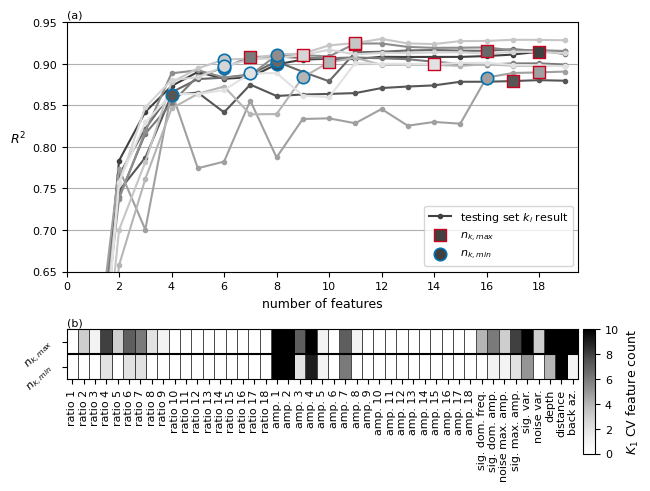

In [127]:
best_N_label = '$\it{n}$$_{max}$'
oste_N_label = '$\it{n}$$_{min}$'
bestk_N_label = '$\it{n}$$_{k,max}$'
ostek_N_label = '$\it{n}$$_{k,min}$'
# fig, axes = plt.subplots(2, 2)
fig, axes = plt.subplots(2, 1, height_ratios=[1, 0.2], constrained_layout=True)
full_score_array = rfecv_results['N_scores']
N = len(full_score_array[0])
x = np.arange(N)+1

# Plot all profiles for K-fold cross-val
line_label = 'testing set $k_i$ result'
bestk_scatter_label = bestk_N_label
ostek_scatter_label = ostek_N_label
for j, f in enumerate(full_score_array):
    # Use color gradient for each i
    cmval = (j/(len(full_score_array)+5))+0.2
    color = cm.Greys_r(cmval)
    axes[0].plot(x, f, 
                            color=color, 
                            label=line_label,
                            marker='.')
    cv_best_N = np.argmax(f)
    cv_oste_N = select_N_one_standard_error(f, larger_score_is_better=True)
    axes[0].scatter(cv_best_N, f[cv_best_N-1], marker="s",
                                color=cm.Greys_r(cmval), 
                               #color='#ca0020',
                                label=bestk_scatter_label, 
                                zorder=20,
                                s=80,
                                edgecolor='#ca0020',
                                #edgecolor='k',
                                linewidth=1.0)
    axes[0].scatter(cv_oste_N, f[cv_oste_N-1], marker="o", 
                               color=cm.Greys_r(cmval), 
                               #color='#0571b0',
                               label=ostek_scatter_label, zorder=20,
                               s=80,
                               edgecolor='#0571b0',
                               #edgecolor='k',
                               linewidth=1.2)    
    bestk_scatter_label = None
    ostek_scatter_label = None
    line_label=None
axes[0].grid(axis='y')
axes[0].legend()
axes[0].set_ylabel("$R^2$", rotation=0, labelpad=10)

# ## Plot the average R^2 results
# N_avgs = np.average(full_score_array, axis=0)
# N_min = np.min(full_score_array, axis=0)
# N_max = np.max(full_score_array, axis=0)
# N_feats_to_use = rfecv_results['best_N']
# oste_N = rfecv_results['oste_N']
# axes[0].plot(x, N_avgs, label='$K_1$ cross-validation avg.', markersize=5, marker='o', color='r')
# axes[0].scatter(N_feats_to_use, N_avgs[N_feats_to_use-1], 
#                 marker="s", 
#                 color='#ca0020', 
#                 label=best_N_label, 
#                 zorder=20, 
#                 s=90,
#                 edgecolor='k',
#                 linewidth=1.0)
# axes[0].scatter(oste_N, N_avgs[oste_N-1], 
#                 marker="o", 
#                 color='#0571b0', 
#                 label=oste_N_label, 
#                 zorder=20, 
#                 s=90,
#                 edgecolor='k',
#                 linewidth=1.0)    


# Plot heat map for rfecv
im1 = axes[1].imshow(rfecv_merge.T.to_numpy(), cmap=cm.Grays, aspect='auto')
axes[1].set_xticks(np.arange(rfecv_merge.shape[0]), feature_names, rotation=90)
axes[1].set_yticks(np.arange(rfecv_merge.shape[1]), 
                [bestk_N_label, ostek_N_label], 
                rotation=45);
axes[1].axhline(0.5, color='k')
for l in np.arange(rfecv_merge.shape[0])+0.475:
    axes[1].axvline(l, color='k', linewidth=0.5)
plt.colorbar(im1, location='right', label="$K_1$ CV feature count",
             shrink=2.5, aspect=10, pad=0.01, anchor=(1.0, 1.0),)

# Left plot settings
axes[0].set_ylim([0.65, 0.95])
axes[0].set_xlim([0.5, 19.5])
axes[0].set_xticks(np.arange(0, 20, 2));
axes[0].set_xlabel("number of features")

splabels = ['(a)', '(b)']
spypos = [1.02, 1.06]
for i in range(2):
    shiftx = 0
    axes[i].text(0, spypos[i], splabels[i], transform=axes[i].transAxes)

# fig.savefig("../figures/rfe_summary_example.png", dpi=300)